In [1]:
import os

import numpy as np
import pandas as pd

import argparse


In [14]:
# Read nursingChart.csv
lab = pd.read_csv( 'lab.csv')


In [15]:
col = ['patientunitstayid', 'labresultoffset', 'labname', 'labresult']
new_lab=lab[col]
new_lab.head

<bound method NDFrame.head of           patientunitstayid  labresultoffset     labname  labresult
0                    141168             2026  fibrinogen     177.00
1                    141168             1133    PT - INR       2.50
2                    141168             2026   magnesium       2.00
3                    141168             1133          PT      26.60
4                    141168             2141          pH       7.20
...                     ...              ...         ...        ...
39132526            3353263               -7  WBC x 1000       6.40
39132527            3353263             1733         RBC       4.67
39132528            3353263               -7      -monos      10.00
39132529            3353263             1733  WBC x 1000       6.60
39132530            3353263             1733         MCH      28.00

[39132531 rows x 4 columns]>

In [25]:
filter_items=['glucose']

f_lab = new_lab[new_lab['labname'].isin(['glucose','bedside glucose'])]

#f_lab.loc[78]
def check(x):
    try:
        x = float(str(x).strip())
    except:
        x = np.nan
    return x
def check_itemvalue(df):
    df['labresult']=df['labresult'].apply(lambda x: check(x))
    df['labresult']=df['labresult'].astype(float)
    return df


#f_lab.loc[f_lab['labname'] == 'bedside glucose', 'labname'] = 'glucose'  # unify bedside glucose and glucose
f_lab['labname'].replace({"bedside glucose": "glucose"}, inplace=True)
f_lab=check_itemvalue(f_lab)

print("Empty results are ",f_lab.isnull().sum())
#f_lab = f_lab[f_lab['labname'].isin(['bedside glucose'])]
f_lab.iloc[1359]
#np.where(pd.isnull(f_lab['labresult']))
f_wna_lab=f_lab.dropna()
f_wna_lab.head

<ipython-input-25-746a0e9fee82>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labresult']=df['labresult'].apply(lambda x: check(x))
<ipython-input-25-746a0e9fee82>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labresult']=df['labresult'].astype(float)


Empty results are  patientunitstayid       0
labresultoffset         0
labname                 0
labresult            6868
dtype: int64


<bound method NDFrame.head of           patientunitstayid  labresultoffset  labname  labresult
78                   141168             2026  glucose       54.0
87                   141168              516  glucose      131.0
136                  141168             1133  glucose       95.0
151                  141178             -280  glucose       77.0
172                  141179               82  glucose       54.0
...                     ...              ...      ...        ...
39132310            3353254             1844  glucose      130.0
39132325            3353254             4144  glucose      115.0
39132331            3353254             5558  glucose      124.0
39132408            3353254             -256  glucose      181.0
39132447            3353263               -7  glucose      100.0

[4488463 rows x 4 columns]>

In [27]:
f_wna_lab.head

<bound method NDFrame.head of           patientunitstayid  labresultoffset  labname  labresult
78                   141168             2026  glucose       54.0
87                   141168              516  glucose      131.0
136                  141168             1133  glucose       95.0
151                  141178             -280  glucose       77.0
172                  141179               82  glucose       54.0
...                     ...              ...      ...        ...
39132310            3353254             1844  glucose      130.0
39132325            3353254             4144  glucose      115.0
39132331            3353254             5558  glucose      124.0
39132408            3353254             -256  glucose      181.0
39132447            3353263               -7  glucose      100.0

[4488463 rows x 4 columns]>

45268.0

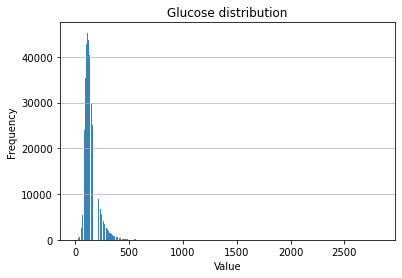

In [17]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=f_wna_lab['labresult'], bins='auto',
                            alpha=0.9, rwidth=0.85)
plt.grid(axis='y', alpha=0.9)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Glucose distribution')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
maxfreq

In [18]:
f_wna_lab['labresult'].describe()

count    4.488463e+06
mean     1.497503e+02
std      6.714042e+01
min      0.000000e+00
25%      1.080000e+02
50%      1.340000e+02
75%      1.720000e+02
max      2.827000e+03
Name: labresult, dtype: float64

In [28]:
f_wna_lab.head

<bound method NDFrame.head of           patientunitstayid  labresultoffset  labname  labresult
78                   141168             2026  glucose       54.0
87                   141168              516  glucose      131.0
136                  141168             1133  glucose       95.0
151                  141178             -280  glucose       77.0
172                  141179               82  glucose       54.0
...                     ...              ...      ...        ...
39132310            3353254             1844  glucose      130.0
39132325            3353254             4144  glucose      115.0
39132331            3353254             5558  glucose      124.0
39132408            3353254             -256  glucose      181.0
39132447            3353263               -7  glucose      100.0

[4488463 rows x 4 columns]>

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#labresult = f_wna_lab['labresult'].as_matrix().reshape(-1, 1)
#f_wna_lab_s['labresult'] = scaler.fit_transform(labresult)
#f_wna_lab_s.hist(figsize=(15,6), column=['labresult'])

In [55]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#value=f_wna_lab['labresult'].values
#df = pd.DataFrame(f_wna_lab,columns=['labresult'])
#float_array = f_wna_lab['labresult'].values.astype(float)
#df =pd.DataFrame(float_array,columns=['labresult'])
#min_max_scaler = MinMaxScaler()
#scaled_array = min_max_scaler.fit_transform(float_array)
#df_normalized = pd.DataFrame(scaled_array)
#df_normalized
df = pd.DataFrame(f_wna_lab,columns=['labresult'])
print(df.isnull().sum())

#float_array = df['labresult'].values.astype(float)
#df =pd.DataFrame(float_array,columns=['labresult'])
min_max_scaler = MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(scaled_array)
df_normalized
df['scale']=scaled_array
df['old_scale']=f_wna_lab['labresult']
print(df.isnull().sum())
df


#scaled_array.isnull().sum()
#TotalPayReshaped = .TotalPmin_max_scaler = preprocessing.MinMaxScaler()
#4
#scaled_array = min_max_scaler.fit_transform(float_array)ay.as_matrix().reshape(-1, 1)
#x_scaled = scaler.fit_transform(value)
#f_wna_lab_s['labresult']=pd.DataFrame(x_scaled)
#df.hist(figsize=(15,6), column=[‘TotalPay’])

labresult    0
dtype: int64
labresult    0
scale        0
old_scale    0
dtype: int64


,labresult,scale,old_scale
78,54.0,0.019102,54.0
87,131.0,0.046339,131.0
136,95.0,0.033605,95.0
151,77.0,0.027237,77.0
172,54.0,0.019102,54.0
...,...,...,...
39132310,130.0,0.045985,130.0
39132325,115.0,0.040679,115.0
39132331,124.0,0.043863,124.0
39132408,181.0,0.064025,181.0


In [45]:
(54-1.497503e+02)/0.019102

-5012.579834572296

In [57]:
print("max is {:.4f}".format(f_wna_lab['labresult'].max()))
print("min is {:.4f}".format(f_wna_lab['labresult'].min()))
print("mean is {:.4f}".format(f_wna_lab['labresult'].mean()))

maxx=f_wna_lab['labresult'].max()
minn=f_wna_lab['labresult'].min()
mean=f_wna_lab['labresult'].mean()

val=100
(val-minn)/(maxx-minn)

max is 2827.0000
min is 0.0000
mean is 149.7503


0.035373187124159884